# Modelo Supervisado - Clasificación

**Fecha**: 0623

**Objetivo**:

El objetivo de un modelo de "***Machine Learning Supervisado***" de clasificación para detectar "***churns***" es predecir si un cliente dejará de utilizar un servicio o producto en un futuro cercano.


Esto ayuda a las empresas a identificar y tomar medidas preventivas para retener a los clientes que tienen mayor probabilidad de abandonar, lo que puede mejorar la retención de clientes y la rentabilidad del negocio.

In [1]:
# Procesamiento de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Métricas de Error
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cross-Validation
from sklearn.model_selection import RandomizedSearchCV

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


## **Paso #1**: Carga y procesamiento de bases (compartir archivos)

In [2]:
!ls

Customer-Churn-Records.csv  sample_data


In [3]:
# Load your dataset or use any database you find online
df = pd.read_csv('Customer-Churn-Records.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [4]:
# ¿Hay nulos?, ¿Qué tipo de datos tiene cada columna?
print("Forma de la base: ", df.shape)
df.info()

Forma de la base:  (10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  100

In [5]:
# Estadísticos por columna
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
# Eliminar columna "RowNumber"
df.drop(["RowNumber"],inplace=True,axis=1)

In [7]:
print("Columnas de 'DB': ", list(df.columns))

Columnas de 'DB':  ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']


In [8]:
# Cambio de nombre de las columnas
df.columns = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
              'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
              'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore', 'CardType', 'PointEarned']


## **Paso #2**: Exploración de Datos

In [9]:
df.dtypes

CustomerId             int64
Surname               object
CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Complain               int64
SatisfactionScore      int64
CardType              object
PointEarned            int64
dtype: object

**Variables Numéricas**

<Axes: >

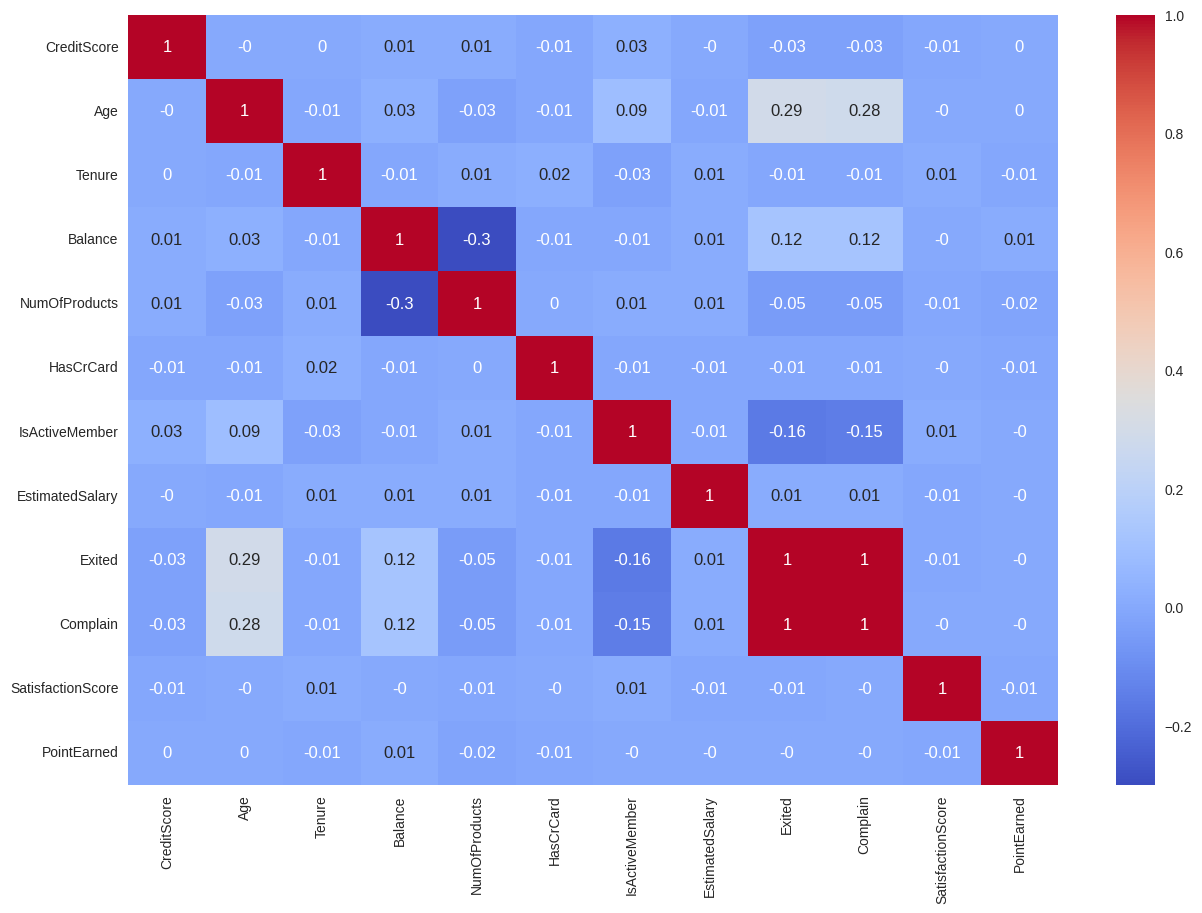

In [10]:
# Es preferible no contar con variables explicativas que tengan alta correlación entre sí
corr = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
          'Complain', 'SatisfactionScore', 'PointEarned']].corr().round(2)

plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [11]:
# Se eliminará "Complain" debido a la alta correlación correlación con "Exited"
df = df.drop(['Complain','CustomerId', 'Surname'], axis = 1)

<Axes: xlabel='PointEarned', ylabel='Count'>

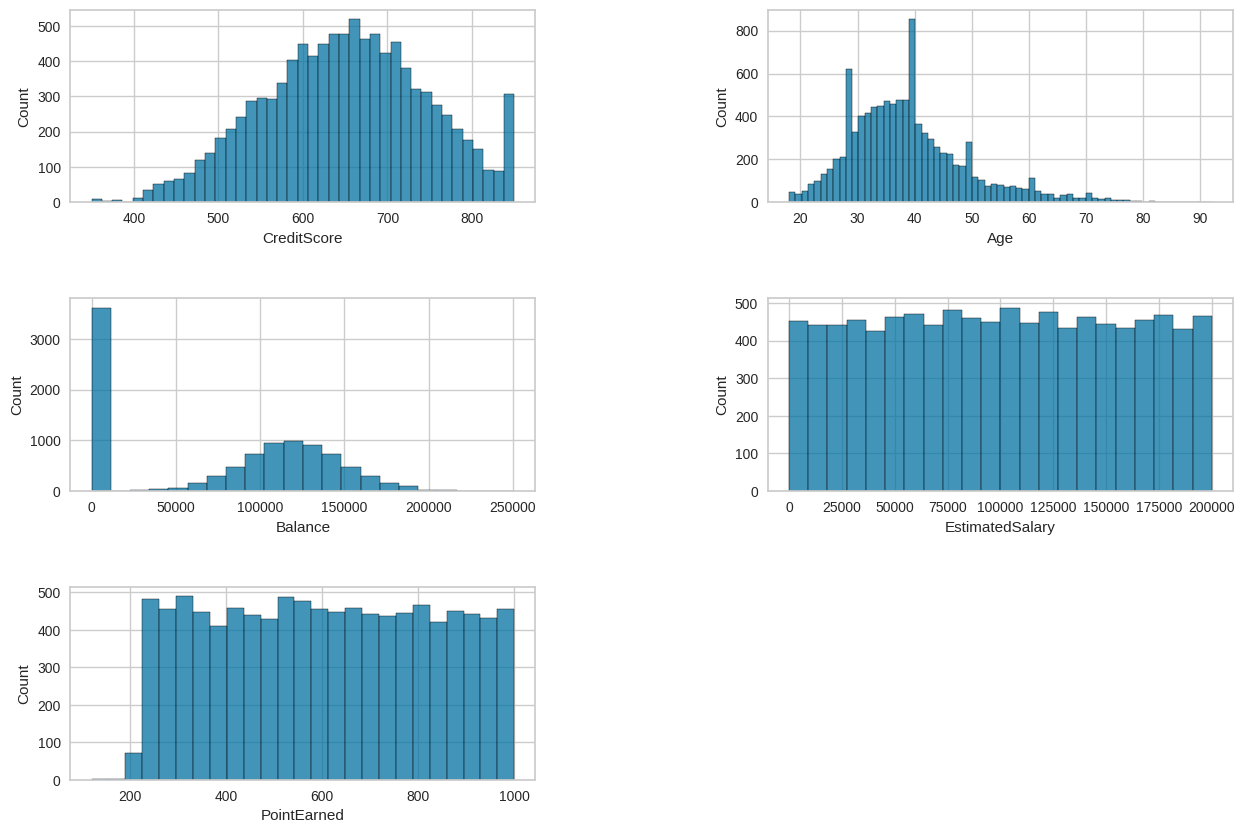

In [12]:
plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df['PointEarned'], kde = False)

**Importante**: Revisar si las variables cuentan con una distribución "normal", y ver si hay algunas donde se vea un sesgo hacia algún lado de la distribución que pudiera afectar el entrenamiento.

<Axes: title={'center': 'Boxplot Credit Score'}, xlabel='CreditScore'>

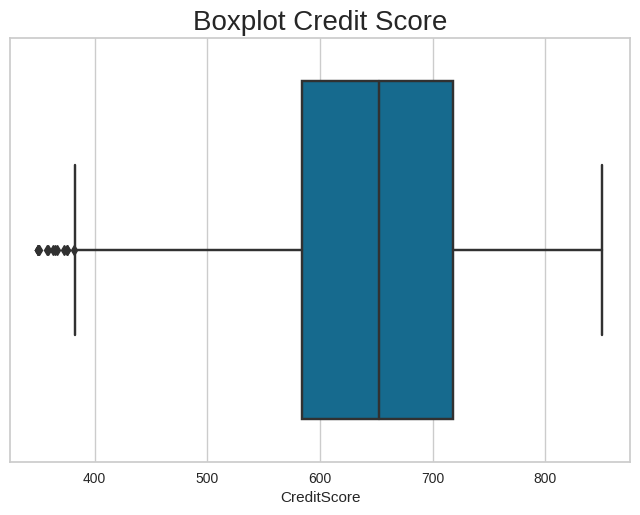

In [13]:
plt.title("Boxplot Credit Score", fontdict = {'fontsize': 20})
sns.boxplot(x=df["CreditScore"])

**Variables Categóricas**

<Axes: title={'center': 'Variable Card Type'}, xlabel='CardType', ylabel='count'>

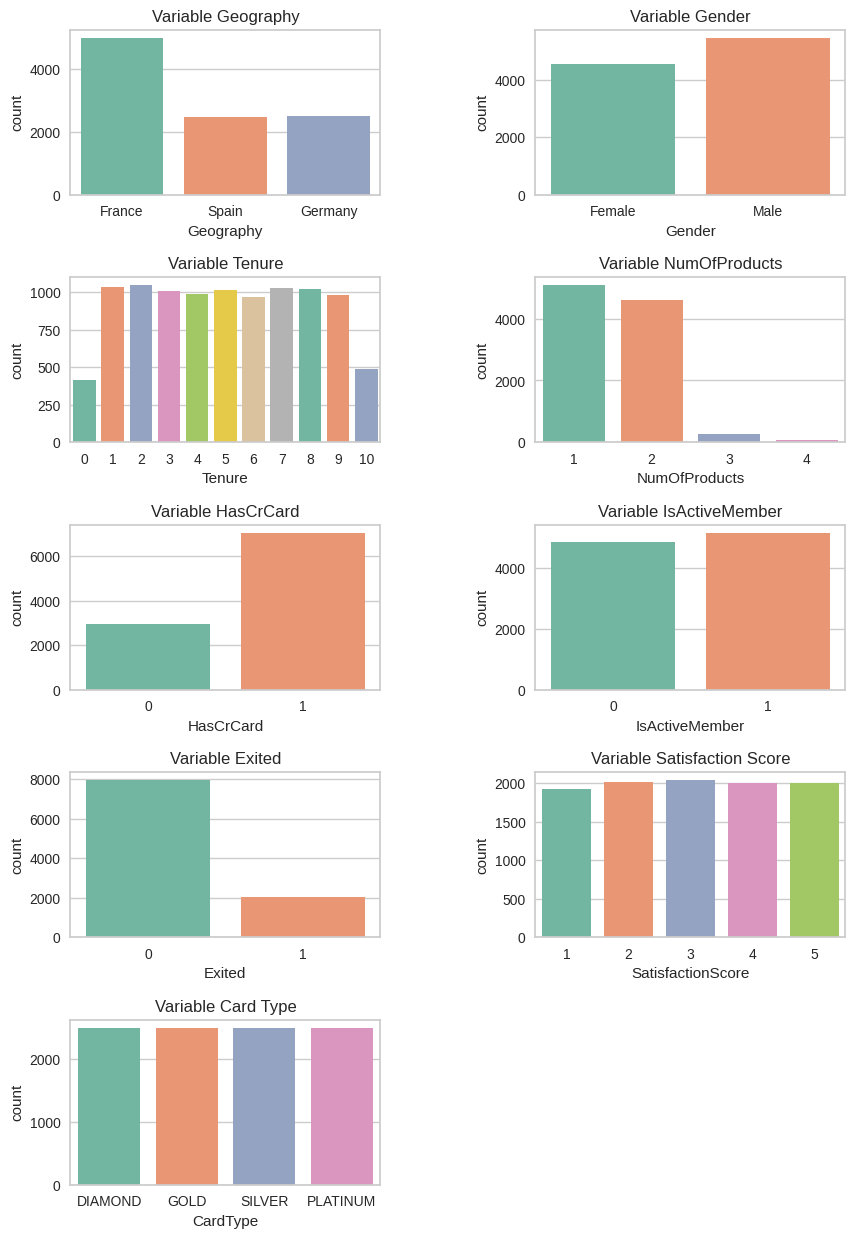

In [14]:
plt.figure(figsize = (10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'SatisfactionScore', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'CardType', palette = 'Set2', data = df)

**Importante**: Nuestra variable objetivo ("Exited") está desbalanceada. Esto puede afectar a los resultados del entrenamiento.

**Análisis Bivariado**

<Axes: xlabel='Exited', ylabel='PointEarned'>

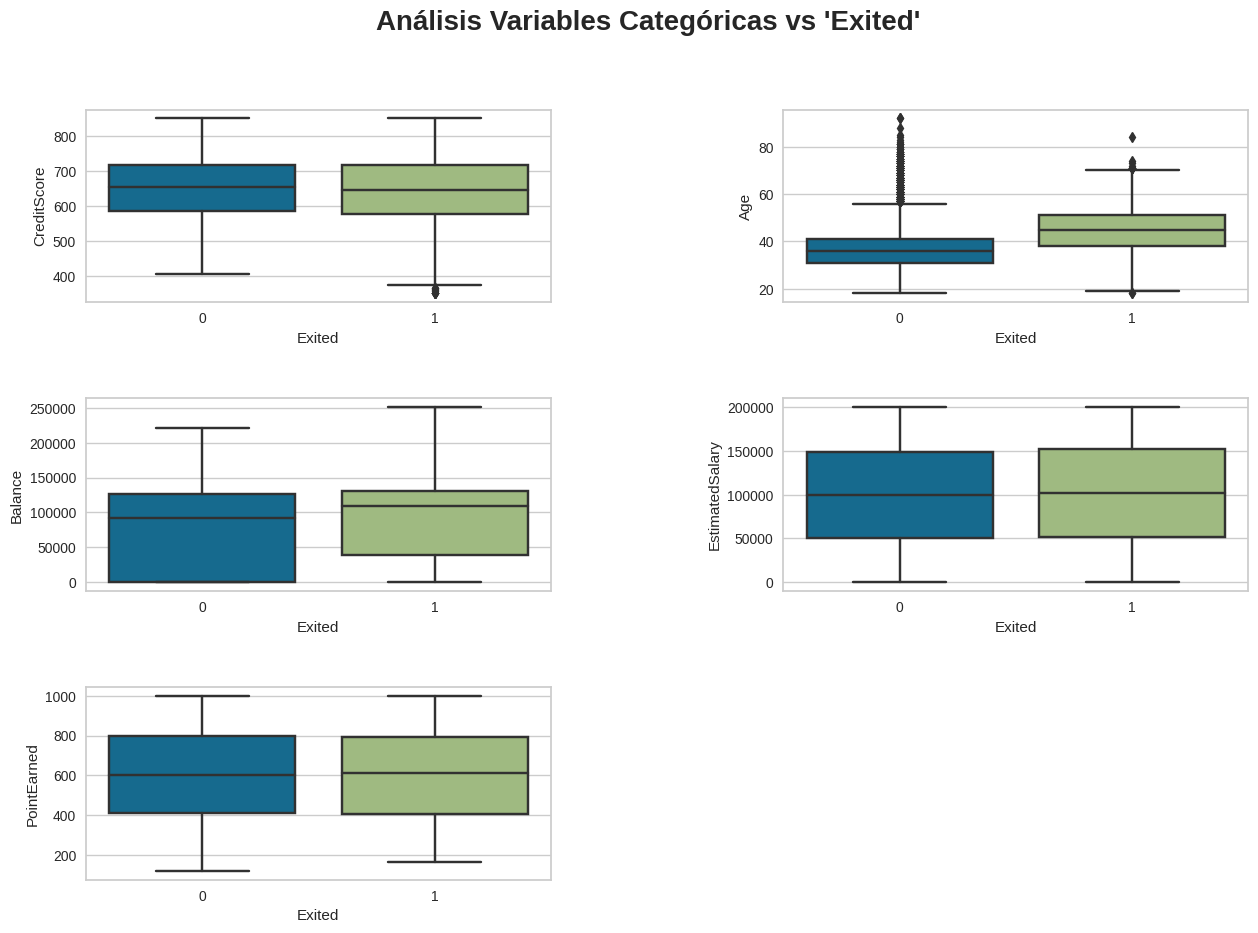

In [15]:
plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle("Análisis Variables Categóricas vs 'Exited'",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="PointEarned", data=df)

<Axes: title={'center': 'Variable Card Type'}, xlabel='CardType', ylabel='count'>

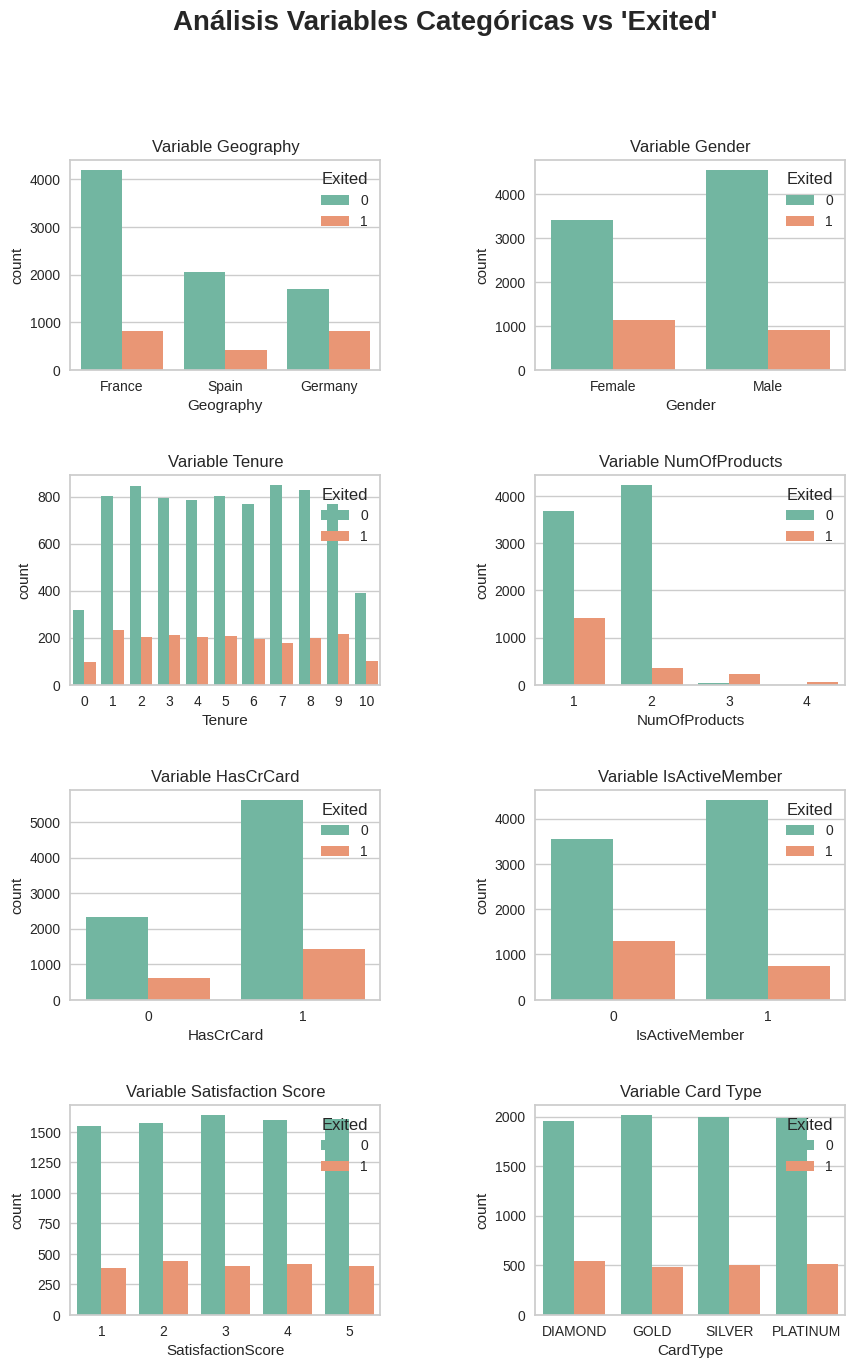

In [16]:
plt.figure(figsize = (10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle("Análisis Variables Categóricas vs 'Exited'",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'SatisfactionScore', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'CardType', hue = 'Exited', palette = 'Set2', data = df)


## **Paso #3**: Procesamiento de Datos

**OneHot Label Encoder**

In [17]:
# 'Dummificazión' de las variables categóricas
ohl = pd.get_dummies(df[['Geography', 'Gender', 'CardType']])

df = pd.concat([df, ohl], axis = 1)
df = df.drop(['Geography', 'Gender', 'CardType'], axis = 1)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SatisfactionScore,PointEarned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CardType_DIAMOND,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0


In [18]:
# Separación de las variables dependiente e independientes
X = df.drop('Exited', axis = 1)
X = X.values

y = df['Exited']

**StandardScaler**

In [19]:
# Se suele estandarizar las variables independientes, puede hacerse lo propio para la dependiente (se recomienda evaluar los dos caminos)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

**División de por data sets**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

**Balancing Classes**

In [21]:
y_train.value_counts()

0    5584
1    1416
Name: Exited, dtype: int64

In [22]:
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)


In [23]:
y_train.value_counts()

1    5584
0    5584
Name: Exited, dtype: int64

## **Paso #4**: Construcción de modelos

**Naive Bayes**

Accuracy:  0.7106666666666667


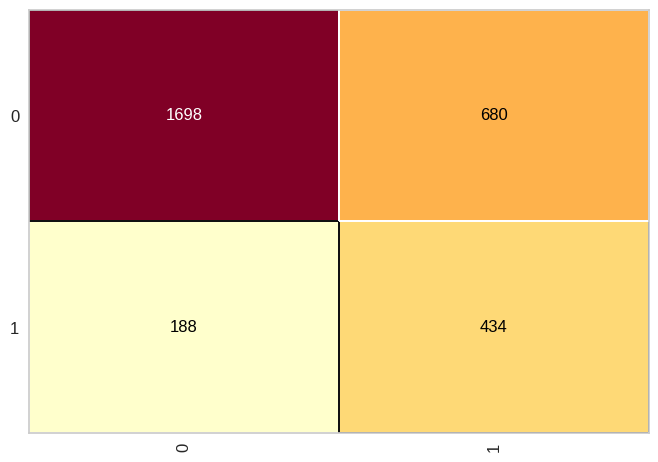

In [24]:
# Llamado al objeto del modelo
naive_bayes = GaussianNB()

# Ajustar el modelo a nuestros datos
naive_bayes.fit(X_train, y_train)

# Predecir resultados utilizando el test set
pred = naive_bayes.predict(X_test)

# Crear la Confusion Matrix
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)

print("Accuracy: ", cm.score(X_test, y_test))


In [25]:
classification_naive_gaussian = (classification_report(y_test, pred))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2378
           1       0.39      0.70      0.50       622

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.65      3000
weighted avg       0.79      0.71      0.73      3000



**1) Precisión**: La precisión mide la exactitud de las predicciones positivas. Es la relación entre los verdaderos positivos (TP) y la suma de verdaderos positivos y falsos positivos (TP + FP). Indica qué tan bien se desempeña el modelo cuando predice una clase positiva.

**2) Recall**: Recall, también conocido como sensibilidad o tasa de verdaderos positivos, mide la proporción de positivos reales que se identifican correctamente. Es la relación entre los verdaderos positivos (TP) y la suma de verdaderos positivos y falsos negativos (TP + FN).

**3) f1-Score**: El Score F1 es la media armónica de precisión y recall. Proporciona un equilibrio entre precisión y recall y se utiliza a menudo como una única métrica para evaluar el rendimiento de un modelo.

**4) Soporte**: El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos etiquetados. Representa el número de muestras para cada clase en la verdad del terreno.

**5) Exactitud**: La exactitud es la corrección general de las predicciones del modelo, calculada como la relación entre las muestras predichas correctamente y el número total de muestras.

**6) Promedio macro**: El promedio macro calcula el promedio de las métricas para cada clase sin tener en cuenta el desequilibrio de clases. Otorga el mismo peso a cada clase.

**7) Promedio ponderado**: El promedio ponderado calcula el promedio ponderado de las métricas, teniendo en cuenta el soporte (número de muestras) de cada clase. Considera el desequilibrio de clases.

**Decision Tree**

In [26]:
# Prueba de combinación de Hyper-parámetros del modelo
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

# Llamado al objeto del modelo
model = DecisionTreeClassifier()

# Cross-Validation
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 10, n_jobs = -1)

# Ajustar el modelo a nuestros datos
gridDecisionTree.fit(X_train, y_train)

# Best Score - Combinación de Hyper-parámetros
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  4
Max Nvl:  11
Algorithm:  gini
Score:  0.8505564058875059


Accuracy:  0.766


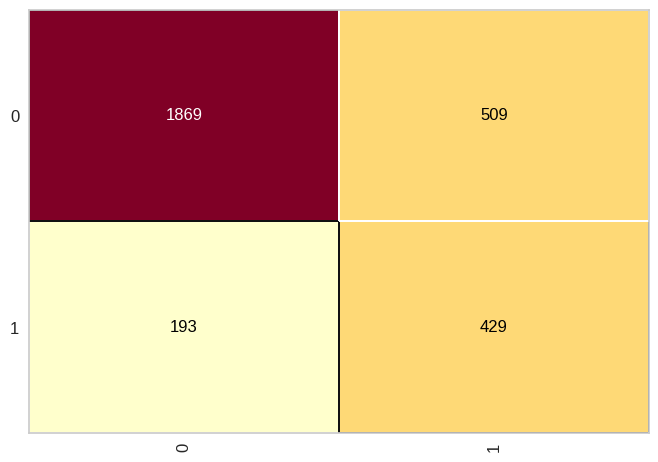

In [27]:
# Entrenamiento con el modelo ganador
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)

print("Accuracy: ", cm.score(X_test, y_test))

In [28]:
classification_decision = (classification_report(y_test, pred))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2378
           1       0.46      0.69      0.55       622

    accuracy                           0.77      3000
   macro avg       0.68      0.74      0.70      3000
weighted avg       0.81      0.77      0.78      3000



In [29]:
# ¿Cuáles son las variables más importantes?
columns = df.drop('Exited', axis = 1).columns

feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp


Age                  0.281124
NumOfProducts        0.176855
Balance              0.131615
EstimatedSalary      0.088956
PointEarned          0.075437
CreditScore          0.066963
Tenure               0.043370
IsActiveMember       0.041642
Geography_Germany    0.029502
SatisfactionScore    0.016569
Gender_Male          0.014114
Geography_Spain      0.007206
CardType_GOLD        0.006539
Gender_Female        0.006416
CardType_SILVER      0.006183
CardType_PLATINUM    0.002321
Geography_France     0.002231
CardType_DIAMOND     0.001523
HasCrCard            0.001435
dtype: float64

In [30]:
a = pd.DataFrame(feature_imp)
a = a.reset_index()
a.columns = ['var','FI']
a.FI.sum()

1.0

**Random Forest**

In [31]:
# Prueba de combinación de Hyper-parámetros del modelo
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

# Llamado al objeto del modelo
model = RandomForestClassifier()

# Cross-Validation
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)

# Ajustar el modelo a nuestros datos
gridRandomForest.fit(X_train, y_train)

# Best Score - Combinación de Hyper-parámetros
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.8950584160999991
Mín Split:  2
Max Nvl:  11


0.8366666666666667

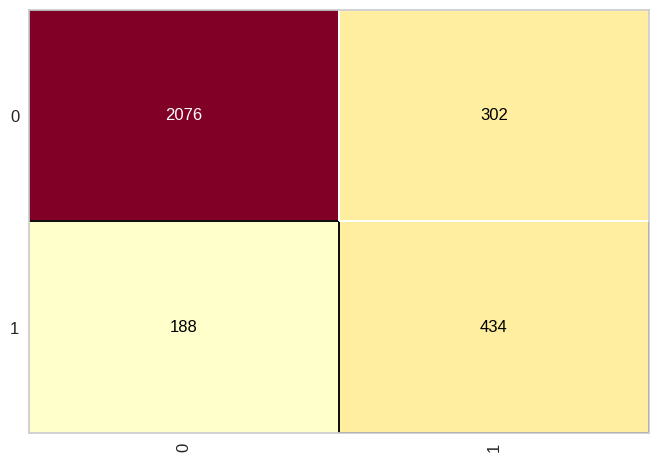

In [32]:
# Entrenamiento con el modelo ganador
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 7, max_depth= 11,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [33]:
classification_random = (classification_report(y_test, pred))
print(classification_random)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2378
           1       0.59      0.70      0.64       622

    accuracy                           0.84      3000
   macro avg       0.75      0.79      0.77      3000
weighted avg       0.85      0.84      0.84      3000



In [34]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Age                  0.267069
NumOfProducts        0.170386
Balance              0.103021
CreditScore          0.078642
PointEarned          0.076103
EstimatedSalary      0.073257
Tenure               0.044084
IsActiveMember       0.038729
Geography_Germany    0.031678
SatisfactionScore    0.027303
Geography_France     0.013233
Gender_Female        0.012659
Gender_Male          0.011453
HasCrCard            0.010350
CardType_SILVER      0.008672
CardType_DIAMOND     0.008619
CardType_GOLD        0.008466
Geography_Spain      0.008216
CardType_PLATINUM    0.008060
dtype: float64

**Resumen**

In [35]:
Naive_dict = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':0.69}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':0.77}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':0.83}


resumen = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict)
                      })

resumen

,Naive Bayes,Decision Tree,Random Forest
Model,Naive Bayes,Decision Tree,Random Forest
Scaling,Normal Data,Normal Data,Normal Data
Type,Gaussian,Gini,Gini
Precision,0.69,0.77,0.83
